**1.1** 参考用に「TensorFlowで学ぶディープラーニング入門」と「ゼロから作るDeep Learning」の資料をcloneする  
（このハンズオン資料の作り方は上記「TensorFlowで学ぶディープラーニング入門」の演習資料の作り方をそのまま参考にしています）

In [ ]:
!git clone https://github.com/enakai00/jupyter_tfbook

In [ ]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch

**1.2** pythonの書き方を少しだけ解説

In [ ]:
a = 12.3
b = "test"

In [ ]:
print(a, b)

In [ ]:
a = [2, 3, 4, 5]

In [ ]:
print(a)

In [ ]:
a[3]

In [ ]:
import numpy as np

In [ ]:
A = np.array([2, 0])

In [ ]:
print(A)

In [ ]:
B = np.array([[1, 2],[2, 3]])

In [ ]:
print(B)

In [ ]:
print(B[0][1])

In [ ]:
def h(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
h(-1)

In [ ]:
h(10)

In [ ]:
for i in range(-2, 2):
    print(i, h(i))

**1.3** 手でニューロンの動きを計算したのと同じものを作る

In [15]:
X = np.array([5, 0])

In [16]:
W = np.array([1, 2])

In [17]:
b = 16

In [18]:
def output_perceptron(w, x):
    s = 0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    print("W:" + str(w) + " X:" + str(x) + " y:" + str(y))
    return y

In [19]:
output_perceptron(W, X)

W:[1 2] X:[5 0] y:0


0

In [20]:
alpha = 1

In [21]:
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    for i in range(len(w)):
        dw = alpha*(t - y)*h(x[i])
        w[i] += dw
        print("dw:" + str(dw) + " t:" + str(t) + " y:" + str(y) + " xi:" + str(x[i]))
        print("t:" + str(t) + " y:" + str(y) + " x:" + str(x[i]) + " h(x):" + str(h(x[i])) + " dw:" + str(dw))

In [22]:
train_perceptron(W, X, 1)

W:[1 2] X:[5 0] y:0
dw:1 t:1 y:0 xi:5
t:1 y:0 x:5 h(x):1 dw:1
dw:0 t:1 y:0 xi:0
t:1 y:0 x:0 h(x):0 dw:0


In [23]:
print(W)

[2 2]


In [24]:
data    = np.array([[5, 0], [0, 4], [1, 1], [3, 4], [2, 3], [1, 3], [2, 1], [0, 2], [2, 2], [3, 0]])
teacher = np.array([ 1,      1,      0,      1,      1,      1,      0,      0,      1,      0    ])

In [32]:
def train(train_count):
    for count in range(train_count):
        i = np.random.randint(10)
        x = data[i]
        t = teacher[i]
        train_perceptron(W, x, t)
        print(W)

In [ ]:
W = np.array([1, 3])
b = 16
alpha = 1
train(30)

In [ ]:
W = np.array([1.0, 3.0])
b = 16
alpha = 0.1
train(100)

In [39]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [40]:
images, labels = mnist.train.next_batch(10)

In [41]:
print(images[1])
print(labels[1])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [42]:
import matplotlib.pyplot as plt

3


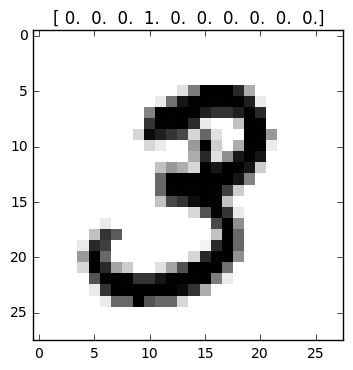

In [43]:
fig = plt.figure(figsize=(8,4))
plt.title(labels[1])
plt.imshow(images[1].reshape((28,28)), vmin=0, vmax=1,
           cmap=plt.cm.gray_r, interpolation="nearest")
print(np.argmax(labels[1]))

In [14]:
def h(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
def output_perceptron(w, x):
    # s = np.sum(w*x)
    s = 0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    return y

In [385]:
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    square_error = 0
    for i in range(len(w)):
        dw = alpha*(t - y)*h(x[i])
        w[i] += dw
    square_error += np.square(t - y)
    return square_error

In [311]:
def train_layer(neurons, data, teacher):
    square_error = 0
    for i in range(len(neurons)):
        square_error += train_perceptron(neurons[i], data, teacher[i])
    return square_error

In [317]:
def train_mnist():
    images, labels = mnist.train.next_batch(100)
    square_error = 0
    for i in range(len(images)):
        x = images[i]
        t = labels[i]
        square_error += train_layer(neurons, x, t)
    print(square_error)

In [445]:
neurons = np.random.rand(10, 28*28)
b = 0.1
alpha = 0.01
train_mnist()

700896.0


In [446]:
train_mnist()

278320.0


In [447]:
train_mnist()

163072.0


In [448]:
train_mnist()

125440.0


In [449]:
train_mnist()

101136.0


In [450]:
train_mnist()

112112.0


In [451]:
train_mnist()

108192.0


In [452]:
train_mnist()

89376.0


In [453]:
train_mnist()

89376.0


In [429]:
def test_mnist():
    images, labels = mnist.train.next_batch(1)
    x = images[0]
    t = labels[0]
    print(t)
    for i in range(len(neurons)):
        answer = output_perceptron(neurons[i], x)
        print(str(i) + " neuron:" + str(answer))

In [460]:
test_mnist()

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
0 neuron:0
1 neuron:0
2 neuron:1
3 neuron:0
4 neuron:0
5 neuron:0
6 neuron:0
7 neuron:0
8 neuron:1
9 neuron:0
